#### Import Library

In [1]:
from google_play_scraper import app
from google_play_scraper import Sort, reviews

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Scrapping Data From Playstore

In [2]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

result, continuation_token = reviews(
    'com.runtastic.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=350, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

#### Change data to Data Frame

In [3]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.drop_duplicates(subset = ["content"])

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,196f7dc4-e0fe-41fe-b701-c911511fee3b,Kias Ygy (Iyasss),https://play-lh.googleusercontent.com/a-/ALV-U...,aplikasi ini sangat berguna untuk menghitung P...,5,1,13.46,2024-09-27 16:19:18,None,None,13.46
1,60609141-9509-46db-904e-d465addde75f,Muhammad Aji Saputra,https://play-lh.googleusercontent.com/a-/ALV-U...,aplikasinya sudah bagus tapi ada kendala saat ...,3,2,13.40,2024-07-30 20:34:15,None,None,13.40
2,52ee494b-4d00-475d-bd11-ce925a796572,Ikmal Arif Septiawan,https://play-lh.googleusercontent.com/a-/ALV-U...,Dua harian ini eror min aplikasinya. Trackingn...,3,12,13.39,2024-07-16 13:54:17,None,None,13.39
3,9d9e8589-5956-4d0e-8299-ff2f17688761,Ika Yulaichah,https://play-lh.googleusercontent.com/a-/ALV-U...,Menjadi acuan kita meningkatkan semangat berol...,5,4,13.46,2024-09-21 09:47:13,None,None,13.46
4,9ad95b2e-7f50-4483-b2a1-93e265bac787,wahyu enjang waskito,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya lari keliling lapangan bola 6x hanya terd...,1,2,13.46,2024-09-22 10:44:44,None,None,13.46


In [4]:
len(df_busu.index) #count the number of data we got

350

#### Select the Columns and Sort the Data

In [5]:
#Run This Code to Sort the Data By Date 

new_df = df_busu[['userName', 'score', 'content']] #select the columns you want
new_df.head()

,userName,score,content
0,Kias Ygy (Iyasss),5,aplikasi ini sangat berguna untuk menghitung P...
1,Muhammad Aji Saputra,3,aplikasinya sudah bagus tapi ada kendala saat ...
2,Ikmal Arif Septiawan,3,Dua harian ini eror min aplikasinya. Trackingn...
3,Ika Yulaichah,5,Menjadi acuan kita meningkatkan semangat berol...
4,wahyu enjang waskito,1,Saya lari keliling lapangan bola 6x hanya terd...


#### Save the Data to xlsx file

In [ ]:
new_df.to_excel("../scrapped_data/scrapped_data_adidas.xlsx", index = False)  #Save the file as excel , to download: click the folder icon on the left. the excel file should be there.

#### Show Diagram

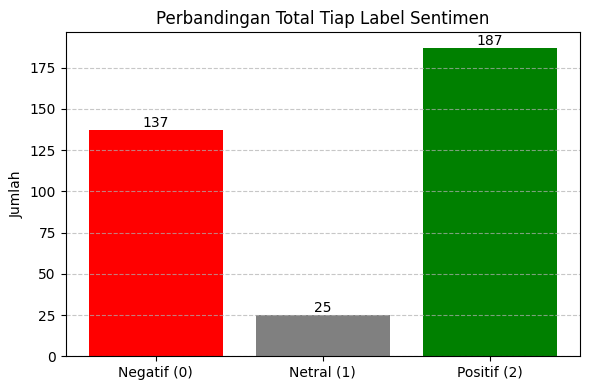

In [ ]:
# Load the dataset from the Excel file
file_path = '../scrapped_data/scrapped_data_adidas.xlsx'  # Update this path
data = pd.read_excel(file_path)

# Count the occurrences of each label
label_counts = data['Label'].value_counts().sort_index()

# Create a bar plot for the label counts
plt.figure(figsize=(6, 4))
bars = plt.bar(label_counts.index, label_counts.values, color=['red', 'gray', 'green'])
plt.xticks([0, 1, 2], ['Negatif (0)', 'Netral (1)', 'Positif (2)'])
plt.ylabel('Jumlah')
plt.title('Perbandingan Total Tiap Label Sentimen')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()